<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

-Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

-Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

-Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Choose your Data

There are 2 datasets included in the [`data`](./data/) folder for this project. These correponds to rainfall information. 

* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022

Other relevant weather datasets from [data.gov.sg](data.gov.sg) that you can download and use are as follows:

* [Relative Humidity](https://data.gov.sg/dataset/relative-humidity-monthly-mean)
* [Monthly Maximum Daily Rainfall](https://data.gov.sg/dataset/rainfall-monthly-maximum-daily-total)
* [Hourly wet buld temperature](https://data.gov.sg/dataset/wet-bulb-temperature-hourly)
* [Monthly mean sunshine hours](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration)
* [Surface Air Temperature](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum)

You can also use other datasets for your analysis, make sure to cite the source when you are using them.

## Problem Statement

Decide on your problem statement that will guide your analysis for this project. For guidelines, sample prompts, or inspiration, check out the README.

**To-Do:** 
   I'm working for a local delivery services company. Every year, delivery operations and customer demand are heavily impacted by rainy weather conditions. This can be circumvented if the company can plan for such conditions beforehand. This project aims to analyse the monthly weather patterns over the year to allow the operations team to better plan and allocate resources during the rainy seasons.



### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on how climate change is affecting different industries or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** 


### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Code:
number_list = [4, 8, 6, 5, 3, 2, 8, 9, 2, 5]
def mean(number_list):    
    return sum(number_list) / len(number_list)

mean(number_list)

5.2

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code:

def standard_deviation(number_list):
    mean_output = mean(number_list)
    temp = 0
    for item in number_list:
        temp = temp + ((item - mean_output) ** 2)
    return (temp/len(number_list))**0.5

standard_deviation(number_list)

2.4

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [3]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Import and Cleaning

### Data Import & Cleaning

Import all the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary. Make sure to comment your code to showcase the intent behind the data processing step.
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values and datatype.
3. Check for any obvious issues with the observations.
4. Fix any errors you identified in steps 2-3.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If the month column data is better analyzed as month and year, create new columns for the same
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
    - Since different climate metrics are in month format, you can merge them into one single dataframe for easier analysis
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [4]:
# Code:
number_rain_day = pd.read_csv('./data/rainfall-monthly-number-of-rain-days.csv')
monthly_total = pd.read_csv('./data/rainfall-monthly-total.csv')
highest_daily_total = pd.read_csv('./data/rainfall-monthly-highest-daily-total.csv')
relative_humidity_mean = pd.read_csv('./data/relative-humidity-monthly-mean.csv')
sunshine_mean = pd.read_csv('./data/sunshine-duration-monthly-mean-daily-duration.csv')
air_temperature = pd.read_csv('./data/surface-air-temperature-monthly-mean.csv')


In [5]:
#showing the shape of each of the individual dataset.
print(number_rain_day.shape)
print(monthly_total.shape)
print(highest_daily_total.shape)
print(relative_humidity_mean.shape)
print(sunshine_mean.shape)
print(air_temperature.shape)

(488, 2)
(488, 2)
(491, 2)
(491, 2)
(491, 2)
(491, 2)


In [6]:
#merging df

rainfall_total_month = pd.merge(number_rain_day,monthly_total)
rh_ss_mean = pd.merge(relative_humidity_mean,sunshine_mean)
rainfall_air_temp = pd.merge(highest_daily_total,air_temperature)

In [7]:
rainfall_means = pd.merge(rainfall_air_temp,rh_ss_mean)
rainfall_means.head(5)

,month,maximum_rainfall_in_a_day,mean_temp,mean_rh,mean_sunshine_hrs
0,1982-01,36.5,25.9,81.2,5.6
1,1982-02,9.4,27.1,79.5,7.6
2,1982-03,61.7,27.2,82.3,5.1
3,1982-04,45.1,27.0,85.9,4.7
4,1982-05,33.0,28.0,83.2,5.8


In [8]:
df = pd.merge(rainfall_means,rainfall_total_month)
df.head(10)

,month,maximum_rainfall_in_a_day,mean_temp,mean_rh,mean_sunshine_hrs,no_of_rainy_days,total_rainfall
0,1982-01,36.5,25.9,81.2,5.6,10,107.1
1,1982-02,9.4,27.1,79.5,7.6,5,27.8
2,1982-03,61.7,27.2,82.3,5.1,11,160.8
3,1982-04,45.1,27.0,85.9,4.7,14,157.0
4,1982-05,33.0,28.0,83.2,5.8,10,102.2
5,1982-06,20.6,28.4,80.3,7.3,8,59.5
6,1982-07,17.2,28.2,77.6,7.6,8,76.3
7,1982-08,57.7,27.7,80.4,5.4,11,169.5
8,1982-09,18.0,27.9,80.6,5.2,9,54.1
9,1982-10,10.0,27.4,81.5,5.6,10,39.3


In [9]:
df[['year','Month']] = df['month'].str.split('-', expand = True)
df.head(5)

,month,maximum_rainfall_in_a_day,mean_temp,mean_rh,mean_sunshine_hrs,no_of_rainy_days,total_rainfall,year,Month
0,1982-01,36.5,25.9,81.2,5.6,10,107.1,1982,01
1,1982-02,9.4,27.1,79.5,7.6,5,27.8,1982,02
2,1982-03,61.7,27.2,82.3,5.1,11,160.8,1982,03
3,1982-04,45.1,27.0,85.9,4.7,14,157.0,1982,04
4,1982-05,33.0,28.0,83.2,5.8,10,102.2,1982,05


In [10]:
df.drop(columns=['month'],inplace=True)
df.columns = df.columns.str.lower()
df.head()

,maximum_rainfall_in_a_day,mean_temp,mean_rh,mean_sunshine_hrs,no_of_rainy_days,total_rainfall,year,month
0,36.5,25.9,81.2,5.6,10,107.1,1982,01
1,9.4,27.1,79.5,7.6,5,27.8,1982,02
2,61.7,27.2,82.3,5.1,11,160.8,1982,03
3,45.1,27.0,85.9,4.7,14,157.0,1982,04
4,33.0,28.0,83.2,5.8,10,102.2,1982,05


In [11]:
#Export data to csv
df.to_csv('./data/df.csv', index=False)

**Summary:** This section shows the process of extracting and cleaning of data.
1. Importing of library (Pandas, numpy, matplot and seaborn)
2. Importing of data.csv 
3. Merging of data 
4. As the date of the merged data is in string in year-month. It is essential to split it for better query later on in the project. 
5. Changing the data types (year, month) from strings to Int. 
6. Save the new df. 

## Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|maximum_rainfall_in_a_day|float|rainfall-monthly-highest-daily-total|This dataset shows the maximum rainfall in mm that is record in a single day a particular month for the past 40 years in singapore.|
|mean_temp|float|surface-air-temperature-monthly-mean|This dataset shows the the monthly mean temperature in degC for the past 40 years in singapore. | 
|mean_rh|float|relative-humidity-monthly-mean|This dataset shows the average relative humidity recorded in Singapore for the past 40 years| 
|mean_sunshine_hrs|float|sunshine-duration-monthly-mean-daily-duration|This dataset shows the average hours of Sunshine exposure monthly for the past 40 years| 
|no_of_rainy_days|Int|rainfall-monthly-number-of-rain-days|This dataset shows the amount of days that rained per month in Singapore for the last 40 years |
|total_rainfall|float|rainfall-monthly-total|This dataset knows the monthly average of rainfall occur in singapore for the past 40 years| 
|year|object|df|Year Date of the dataset| 
|month|object|df|Month Date of the dataset| 



## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       
    - **The above 5 questions are compulsory. Feel free to explore other trends based on the datasets that you have choosen for analysis. You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [12]:
#Code:
df.describe()

,maximum_rainfall_in_a_day,mean_temp,mean_rh,mean_sunshine_hrs,no_of_rainy_days,total_rainfall
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,52.332172,27.678893,82.247541,5.688320,14.061475,177.163730
std,35.746423,0.802195,3.413940,1.205705,4.947394,113.916029
min,0.200000,25.400000,72.000000,2.700000,1.000000,0.200000
25%,30.675000,27.100000,80.000000,4.800000,11.000000,93.850000
50%,43.900000,27.700000,82.650000,5.700000,14.000000,159.450000
75%,63.050000,28.300000,84.700000,6.500000,18.000000,238.075000
max,216.200000,29.500000,90.700000,9.300000,27.000000,765.900000


In [13]:
df.dtypes

maximum_rainfall_in_a_day    float64
mean_temp                    float64
mean_rh                      float64
mean_sunshine_hrs            float64
no_of_rainy_days               int64
total_rainfall               float64
year                          object
month                         object
dtype: object

In [14]:
df.head(5)

,maximum_rainfall_in_a_day,mean_temp,mean_rh,mean_sunshine_hrs,no_of_rainy_days,total_rainfall,year,month
0,36.5,25.9,81.2,5.6,10,107.1,1982,01
1,9.4,27.1,79.5,7.6,5,27.8,1982,02
2,61.7,27.2,82.3,5.1,11,160.8,1982,03
3,45.1,27.0,85.9,4.7,14,157.0,1982,04
4,33.0,28.0,83.2,5.8,10,102.2,1982,05


In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_df = df.select_dtypes(include=numerics)
new_df

,maximum_rainfall_in_a_day,mean_temp,mean_rh,mean_sunshine_hrs,no_of_rainy_days,total_rainfall
0,36.5,25.9,81.2,5.6,10,107.1
1,9.4,27.1,79.5,7.6,5,27.8
2,61.7,27.2,82.3,5.1,11,160.8
3,45.1,27.0,85.9,4.7,14,157.0
4,33.0,28.0,83.2,5.8,10,102.2
...,...,...,...,...,...,...
483,58.8,28.1,80.0,5.2,18,239.6
484,44.6,29.2,76.5,6.7,12,102.0
485,59.4,27.9,79.1,4.7,17,211.8
486,27.8,28.6,76.8,6.2,16,145.2


In [16]:
#sd = {key : value for vars in iterable}

sd = {key: standard_deviation(df[key]) for key in new_df.columns}
print(sd)

#how to round up in a dictionary

{'maximum_rainfall_in_a_day': 35.70977918873312, 'mean_temp': 0.8013725449868125, 'mean_rh': 3.4104399291902836, 'mean_sunshine_hrs': 1.2044686452879794, 'no_of_rainy_days': 4.9423221913224085, 'total_rainfall': 113.79925170470057}


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   maximum_rainfall_in_a_day  488 non-null    float64
 1   mean_temp                  488 non-null    float64
 2   mean_rh                    488 non-null    float64
 3   mean_sunshine_hrs          488 non-null    float64
 4   no_of_rainy_days           488 non-null    int64  
 5   total_rainfall             488 non-null    float64
 6   year                       488 non-null    object 
 7   month                      488 non-null    object 
dtypes: float64(5), int64(1), object(2)
memory usage: 34.3+ KB


In [18]:
df[(df['year'] == '1990')].sort_values(by = 'total_rainfall',ascending = False).head(1)['month'] #masking


104    09
Name: month, dtype: object

In [19]:
#Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020? 
year_list = ['1990', '2000', '2010', '2020']
month_df = pd.DataFrame()

for year in year_list:
    max_month = df[(df['year'] == year)].sort_values(by = 'total_rainfall',ascending = False).head(1)['month'].item()
    min_month = df[(df['year'] == year)].sort_values(by = 'total_rainfall',ascending = True).head(1)['month'].item()                                                                                            
    month_df.loc[year,'max'] = max_month
    month_df.loc[year,'min'] = min_month

print(month_df)

     max min
1990  09  02
2000  11  09
2010  07  02
2020  05  02


**Interpretion:** Based on the result above, we can see that the Northeast Monsoon season occurs between Sep to Nov in the space of 10 years difference with the highest rainfall occur Sep and Nov. However, it seems that from 2010 to 2020 onwards, the highest rainfall record belongs to the Southwest Moonsoon. There seems to be a adverse event that occured in 2000 where the min amount of rainfall occurred in Sep as compared to the rest of the other years period. This could be due to climate change where it was reported in 2020, the temperature was the highest as compared to the other years. 

In [20]:
#Which year have the highest and lowest total rainfall in the date range of analysis?

max_total = df.sort_values(by = 'total_rainfall',ascending = False).head(1)['year'].item()
print(max_total)
min_total = df.sort_values(by = 'total_rainfall',ascending = True).head(1)['year'].item()
print(min_total)


2006
2014


**Interpretion:** The record dry spell that occurred in 2014 over Singapore–Malaysia was caused by the southward contraction of the intertropical convergence zone. This means that there were a lack of wind activities which indirectly help to move thunderstorm clouds. The wettest season in the data of 40 years was known in 2006. This was due to increase acitvities of the sumatra qualls. 

In [21]:
#Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?

year_list = ['1990', '2000', '2010', '2020']
month_df = pd.DataFrame()

for year in year_list:
    max_month = df[(df['year'] == year)].sort_values(by = 'no_of_rainy_days',ascending = False).head(1)['month'].item()
    min_month = df[(df['year'] == year)].sort_values(by = 'no_of_rainy_days',ascending = True).head(1)['month'].item()                                                                                            
    month_df.loc[year,'max'] = max_month
    month_df.loc[year,'min'] = min_month

print(month_df)




     max min
1990  09  03
2000  11  05
2010  11  02
2020  07  01


**Finding:** The data correlate with the highest rainfall data. As in 1990, it was recordest the highest month to be the wettest which significent contribute to to the the highest amount of rainfall. The only differnce is that in 2010, the month of Nov shows that that it had the highest number of days rained however, the highest amount of rainfall record was in July. Hence, We can assumed that in the month of July 2010, there were days that the it rained longer than usual although the days rained are lesser. More in-depth investigation should be done to verified this assumption. 

In [22]:
#Which year have the highest and lowest number of rainy days in the date range of analysis?

max_total = df.sort_values(by = 'no_of_rainy_days',ascending = False).head(1)['year'].item()
print(max_total)
min_total = df.sort_values(by = 'no_of_rainy_days',ascending = True).head(1)['year'].item()
print(min_total)


2018
2014


**Finding:** It is interesting to see that although 2006 recorded the high amount of rainfall, but it was recorded to rain the most in 2018. However, data shows consistency in 2014 where it recorded the lowest amount of rainfall, and the lowest days of rain that occured. 

In [23]:
#Are there any outliers months in the dataset?
df.describe()

,maximum_rainfall_in_a_day,mean_temp,mean_rh,mean_sunshine_hrs,no_of_rainy_days,total_rainfall
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,52.332172,27.678893,82.247541,5.688320,14.061475,177.163730
std,35.746423,0.802195,3.413940,1.205705,4.947394,113.916029
min,0.200000,25.400000,72.000000,2.700000,1.000000,0.200000
25%,30.675000,27.100000,80.000000,4.800000,11.000000,93.850000
50%,43.900000,27.700000,82.650000,5.700000,14.000000,159.450000
75%,63.050000,28.300000,84.700000,6.500000,18.000000,238.075000
max,216.200000,29.500000,90.700000,9.300000,27.000000,765.900000


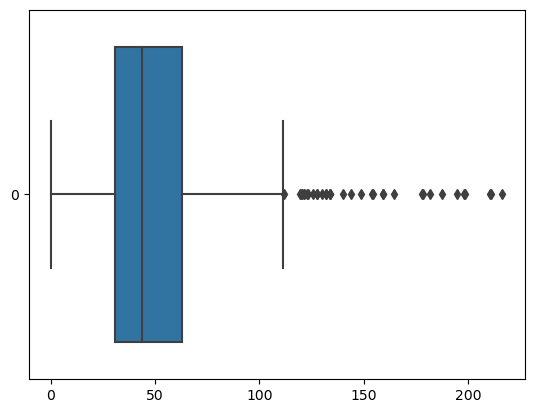

In [24]:
sns.boxplot(data = df['maximum_rainfall_in_a_day'], orient = "h");

#

Yes, there are outliers. Based on the above boxplot, you can see that there are outliers after the 75th percentile value. This boxplot shows the column "maximum rainfall in a day". Although there are many outliers that contribute to the data. As this dataset is considered a weather data hence we can consider that the outliers are not fake data but adverse events that occurs. Adverse event are considered to be ad-hoc or uncommon. For example, based on the above boxplot, from a range of 120 mm of rainfall onwards are considered to be ad-hoc. This can be due to some form of climate change or phenonmon that happened that contributed to this data. 

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Some ideas for plots that can be generated:

- Plot the histogram of the rainfall data with various bins and comment on the distribution of the data - is it centered, skewed?
- Plot the box-and-whiskers plot. Comment on the different quartiles and identify any outliers in the dataset. 
- Is there a correlation between the number of rainy days and total rainfall in the month? What kind of correlation do your suspect? Does the graph show the same?


**Question 1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.**

In [25]:
df.corr()

,maximum_rainfall_in_a_day,mean_temp,mean_rh,mean_sunshine_hrs,no_of_rainy_days,total_rainfall
maximum_rainfall_in_a_day,1.000000,-0.400713,0.438402,-0.387892,0.396088,0.810002
mean_temp,-0.400713,1.000000,-0.631752,0.491729,-0.362360,-0.514120
mean_rh,0.438402,-0.631752,1.000000,-0.594081,0.582346,0.592447
mean_sunshine_hrs,-0.387892,0.491729,-0.594081,1.000000,-0.679018,-0.575614
no_of_rainy_days,0.396088,-0.362360,0.582346,-0.679018,1.000000,0.684252
total_rainfall,0.810002,-0.514120,0.592447,-0.575614,0.684252,1.000000


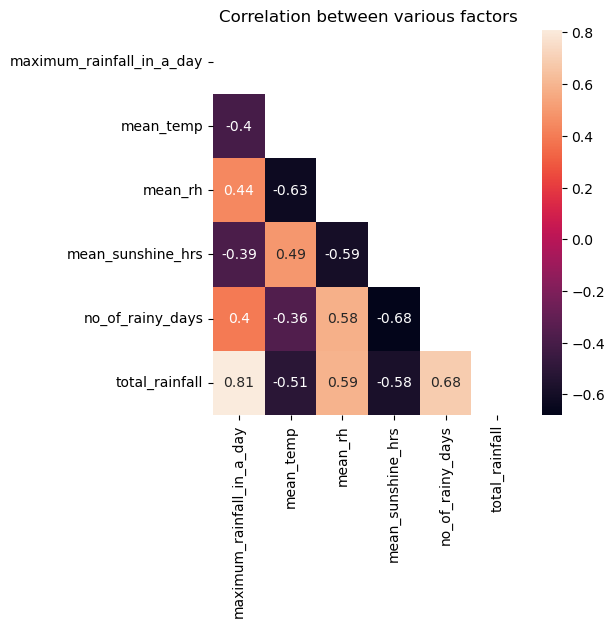

In [26]:
plt.figure(figsize=(5,5))
mask = np.triu(np.ones_like(df.corr(), dtype ='bool'))
sns.heatmap(df.corr(), annot=True, mask = mask);



plt.title("Correlation between various factors");

**Description:** This shows a heat map of the correlationship between the variables. This allows us to see which variables has a strong correlation as shown between total rainfall and maximum rainfall in a day which stand at 0.81. However, heat map in general doesn't tell the full story as the points are all condensed into one hence more detailed analysis is needed to determine the comparison of variables. 

**Question 2: Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.**

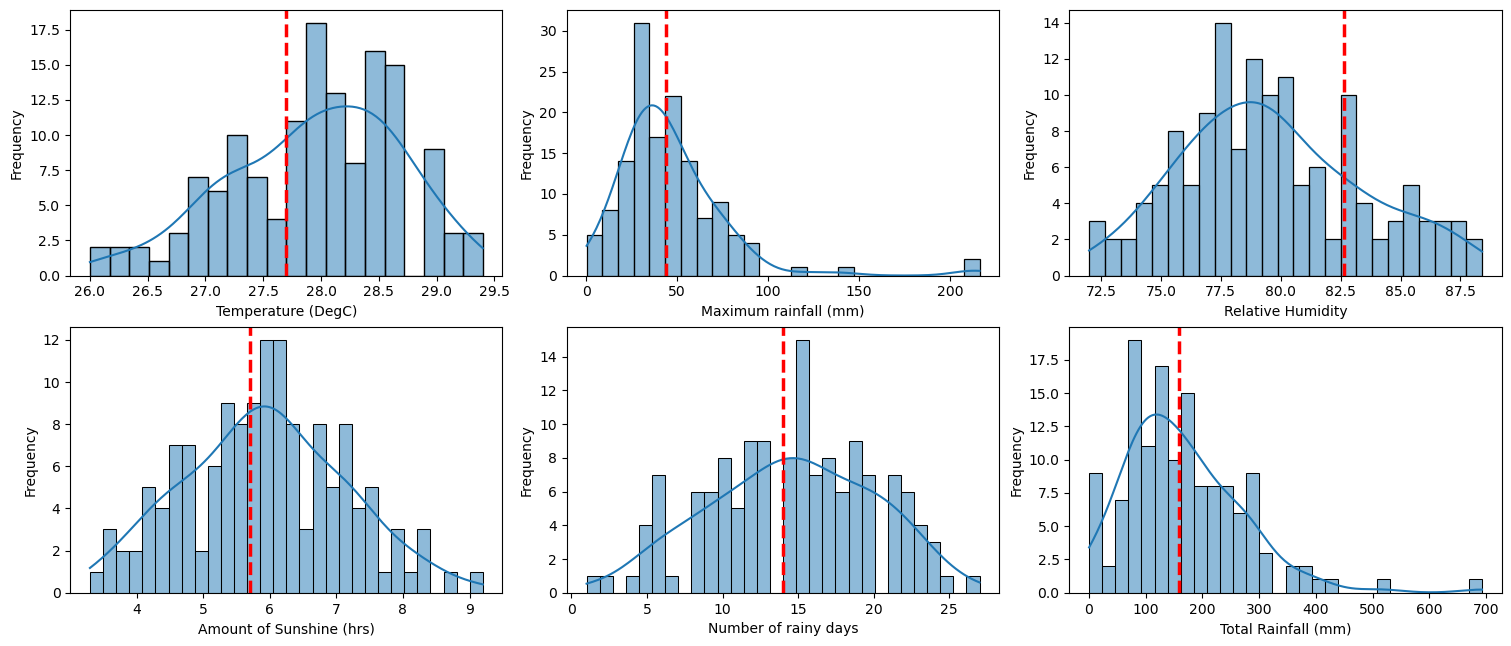

In [27]:
df[['year','month']] = df[['year','month']].astype(int)
#Question 2: HISTOGRAM
plt.figure(figsize=(15,9),constrained_layout=True)

plt.subplot(3, 3, 1)
sns.histplot(data=df.loc[df['year'] > 2010], x="mean_temp", bins = 20, kde = True)
plt.xlabel('Temperature (DegC)')
plt.ylabel('Frequency')
plt.axvline(x = df['mean_temp'].median(), color='red',ls='--', lw=2.5)

plt.subplot(3, 3, 2)
sns.histplot(data=df.loc[df['year'] > 2010], x = "maximum_rainfall_in_a_day", bins = 25, kde = True)
plt.xlabel('Maximum rainfall (mm)')
plt.ylabel('Frequency')
plt.axvline(x = df['maximum_rainfall_in_a_day'].median(), color='red',ls='--', lw=2.5)

plt.subplot(3, 3, 3)
sns.histplot(data=df.loc[df['year'] > 2010], x = "mean_rh", bins = 25, kde = True)
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')
plt.axvline(x = df['mean_rh'].median(), color='red',ls='--', lw=2.5)

plt.subplot(3, 3, 4)
sns.histplot(data=df.loc[df['year'] > 2010], x = "mean_sunshine_hrs",bins = 30, kde = True)
plt.xlabel('Amount of Sunshine (hrs)')
plt.ylabel('Frequency')
plt.axvline(x = df['mean_sunshine_hrs'].median(), color='red',ls='--', lw=2.5)

plt.subplot(3, 3, 5)
sns.histplot(data=df.loc[df['year'] > 2010], x = "no_of_rainy_days",bins = 30, kde = True)
plt.xlabel('Number of rainy days')
plt.ylabel('Frequency')
plt.axvline(x = df['no_of_rainy_days'].median(), color='red',ls='--', lw=2.5)

plt.subplot(3, 3, 6)
sns.histplot(data=df.loc[df['year'] > 2010], x = "total_rainfall",bins = 30, kde = True)
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Frequency')
plt.axvline(x = df['total_rainfall'].median(), color='red',ls='--', lw=2.5);



**Description:** This 6 histogram shows the 6 different variables mapped against frequency.
1. First histogram shows temperature which shows a slightly left skewed. As Singapore is located near the equator, temperature on average is also hot and humid which is similar to the histogram as it showed a left shewed (negative) towards the hotter temperature. 

2. Second histogram shows max rainfall which shows a slight right shewed. This shows that every few years, there will have high rainfall. 

3. Third histogram shows relative humidity which shows a slightly right shewed. With higher rainfall, naturally, there will be a higher humidity hence the histogram shows that relative humidity is recorded to occur more than median

4. Fourth histogram show amount of sunshine which has a symmetric shape.

5. Fifth histogram shows the number of rainy days which has a symmetric shape. 

6. Sixth histogram shows the total rainfall which shows a slightly right shewed. This is also similar as it shows that with longer maximum rainfall, the record for total rainfall will also increased which shows the slightly right shewed (positive) 

**Question 3. Plot and interpret boxplots.**

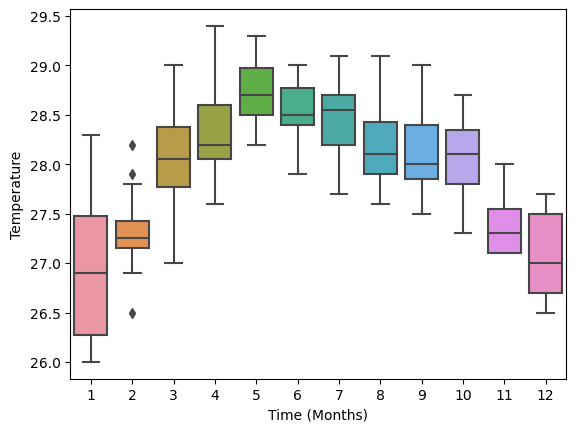

In [28]:
sns.boxplot(data=df.loc[df['year'] > 2010], x= "month", y="mean_temp")
plt.xlabel('Time (Months)')
plt.ylabel('Temperature');

**Description:** The dataset is filtered from 2011 onwards. Based on the graph, we can see the the temperature generally are cooler from Nov to Jan due to the seasonal monsoon and as the wet season passes, temperature starts to raise. The hottest period is from Apr to Oct as this period is also considered the dry and hot summer season in Singapore. 

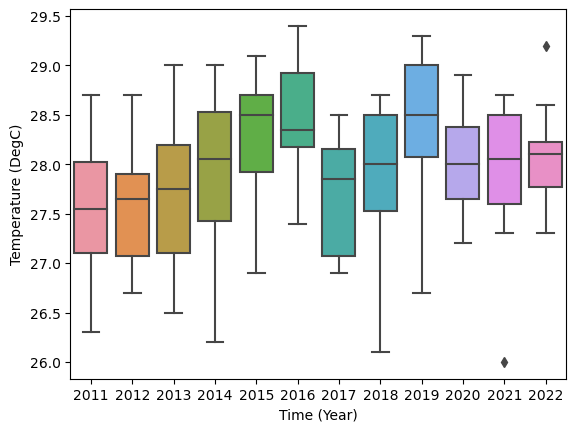

In [29]:
df['year'] = df['year'].astype(int)

sns.boxplot(data=df.loc[df['year'] > 2010], x='year' , y="mean_temp")
plt.xlabel('Time (Year)')
plt.ylabel('Temperature (DegC)');

**Description:** This plot is based on the year basis. There is an average between 27 to 29 degC except for 2017 where Singapore experienced drop in temperature as compared to the other years. This was due to the possibility of a weak monsoon surge developing over the South China Sea and surrounding region — which resulted in windy conditions with moderate rain and cooler temperatures.

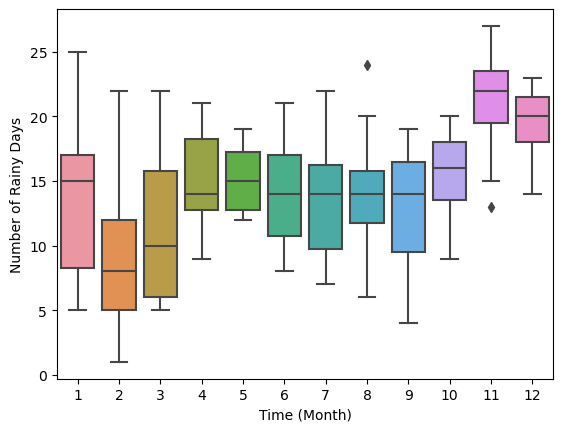

In [30]:
sns.boxplot(data=df.loc[df['year'] > 2010], x='month' , y="no_of_rainy_days")
plt.xlabel('Time (Month)')
plt.ylabel('Number of Rainy Days');

**Description:** Due to the sesasonal monsoon period, it is expected to see an increase of days raining from the Nov to Jan period. Before the dry spell from Feb onwards. From the months of June to October, the days that rained are consistent. 

In [31]:
df.head()

,maximum_rainfall_in_a_day,mean_temp,mean_rh,mean_sunshine_hrs,no_of_rainy_days,total_rainfall,year,month
0,36.5,25.9,81.2,5.6,10,107.1,1982,1
1,9.4,27.1,79.5,7.6,5,27.8,1982,2
2,61.7,27.2,82.3,5.1,11,160.8,1982,3
3,45.1,27.0,85.9,4.7,14,157.0,1982,4
4,33.0,28.0,83.2,5.8,10,102.2,1982,5


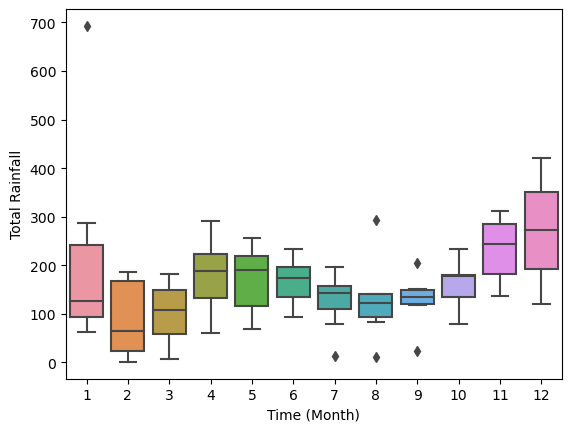

In [32]:
sns.boxplot(data=df.loc[df['year'] > 2015], x='month' , y="total_rainfall")
plt.xlabel('Time (Month)')
plt.ylabel('Total Rainfall');

**Description:** This plot shows the monthly total amount of rainfall from 2015 to 2022. Based on the graph, we can see the the rainfall starts to pick up from October until Jan. After which, it drops before stablising from March onwards, and the cycle will repeat. 

**Question 4:** Plot and interpret scatter plots to view relationships between features.

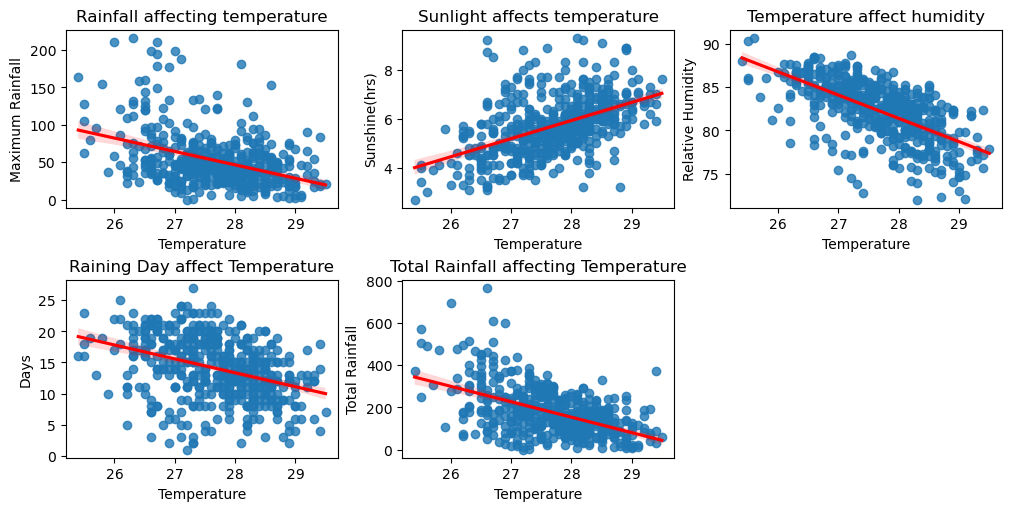

In [33]:
plt.figure(figsize=(10,5),constrained_layout=True)
plt.subplot(2,3,1)
sns.regplot(data = df, x = "mean_temp", y = "maximum_rainfall_in_a_day", line_kws={"color": "red"})
plt.xlabel('Temperature')
plt.ylabel('Maximum Rainfall')
plt.title('Rainfall affecting temperature')

plt.subplot(2,3,2)
sns.regplot(data = df, x = "mean_temp", y = "mean_sunshine_hrs",line_kws={"color": "red"})
plt.xlabel('Temperature')
plt.ylabel('Sunshine(hrs)')
plt.title("Sunlight affects temperature")

plt.subplot(2,3,3)
sns.regplot(data = df, x = "mean_temp", y = "mean_rh",line_kws={"color": "red"})
plt.xlabel('Temperature')
plt.ylabel('Relative Humidity')
plt.title('Temperature affect humidity')

plt.subplot(2,3,4)
sns.regplot(data = df, x = "mean_temp", y = "no_of_rainy_days",line_kws={"color": "red"})
plt.xlabel('Temperature')
plt.ylabel('Days')
plt.title('Raining Day affect Temperature')

plt.subplot(2,3,5)
sns.regplot(data = df, x = "mean_temp", y = "total_rainfall",line_kws={"color": "red"})
plt.xlabel('Temperature')
plt.ylabel('Total Rainfall')
plt.title('Total Rainfall affecting Temperature');


**Description:** The above scatterplots are the correlationship between temperature and the various factors. Based on the above graph, there is a direct and strong relationship. This is logical as the factors are mainly tied to temperature. For example, with higher rainfall, temperature are bound to decrease as it get cooler with windy conditions. 

**Question 5: Additional plots of your choosing.**

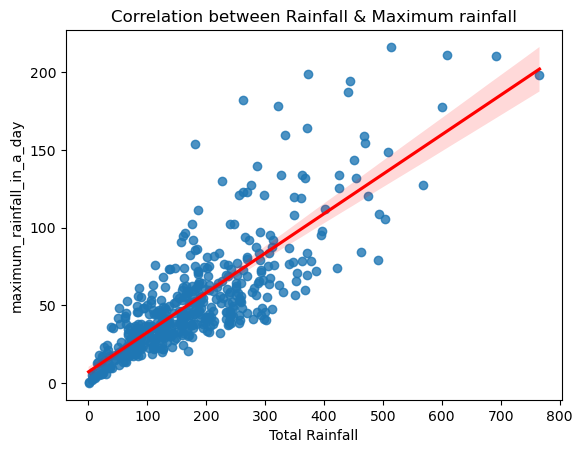

In [34]:
sns.regplot(data = df, x = "total_rainfall", y = "maximum_rainfall_in_a_day",line_kws={"color": "red"})
plt.xlabel('Total Rainfall')
plt.ylabel('maximum_rainfall_in_a_day')
plt.title('Correlation between Rainfall & Maximum rainfall');

**Description:** As the above heat map shows a strong relationship between total rainfall and maximum rainfall in the day hence I have dive in to see the correlation between the variables. As we can see, there is a strong and direct relationship between both variables. 

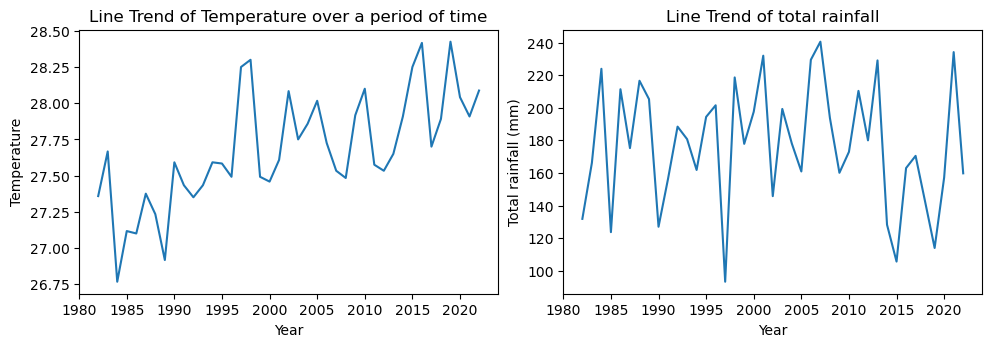

In [35]:
plt.figure(figsize=(14,6),constrained_layout=True)

plt.subplot(2,3,1)
plt.plot(df.groupby(['year'])['mean_temp'].mean())# Plot the chart
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title("Line Trend of Temperature over a period of time")

plt.subplot(2,3,2)
plt.plot(df.groupby(['year'])['total_rainfall'].mean())  # Plot the chart
plt.xlabel('Year')
plt.ylabel('Total rainfall (mm)')
plt.title("Line Trend of total rainfall");


**Description:** Based on the above, we can see the effect of climate change. From 1980 to 2020, there is an increase of temperature. The spike came from 1990 onwards. This could be due to higher economic activities. When compared with the line trend of total rainfall, the high spike in temperature was also contributed to the low rainfall from 1995.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

**To-Do:**
**Conclusion**

Rainfall contribute directly to the temperature which can impact food delivery orders and types of food delivery.

Temperature plays a major role in the types of food that people ordered. For example, people in hot and humid conditions will like to eat cold food to regulate their body temperature. They also tends to avoid savory food. However, in cold and wet conditions, people tends to eat warm food like soups and spicy dishes to bring up their temperature and to stay warm.

it was also found that poor air quality will increase takeaway orders as people will avoid going out on poor air quality conditions which increase online shopping or takweaways.

Overall, there have been talks of climate change and global warming. From the data analysis, the data showed that there were any increase of tempeature of a period of 40 years. This data is extremely important as it helps to tells us the challenges and difficult that climate change might do to us. For example, with the change of climate and uncommon rainfall or drought, normal harvest of crops are delayed which will affect the supply chain network which might cause higher spending.

**Recomendation**

Due to the wet weather season from October to January, it is recommended that delivery platform to add in additional drivers to meet the demand. This will help to increase sales and business and at the same time lower the demand price of a particular service. This is specially important because the period of thre monsoon season falls during the festive period which people will come out to do more spending.

With the data showing that the wet season are mainly from October – January. This correspond with the spending season such as Christmas and New year hence some program incentive should be implemented.

As relationships between weather and takeaway food are different on different days of the week and different seasons of the year. it is recommended that the research findings could help the delivery food platform and settled businesses to find out consumer preferences on takeaway food in different weather conditions, formulate corresponding promotion programs and better to meet consumer demand.

Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!